In [12]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

In [13]:
TIC = "TIC 156003563"
available_data_all = lk.search_lightcurve(TIC)

<IPython.core.display.Javascript object>


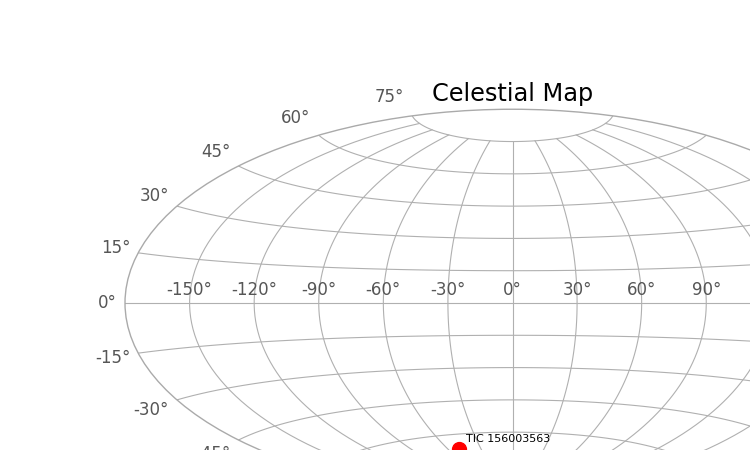

In [15]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import SkyCoord
from astroquery.mast import Catalogs

# Assuming the target variable is already defined with the TIC or TOI number

# Retrieve the coordinates of the TIC object
tic_table = Catalogs.query_object(target, catalog="TIC")
coords = SkyCoord(ra=tic_table['ra'][0], dec=tic_table['dec'][0], unit='deg', frame='icrs')

# Convert to Galactic coordinates
galactic_coords = coords.galactic

# Plot the celestial map
plt.style.use(astropy_mpl_style)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='aitoff')

# Plot the TIC object
longitude_wrapped = galactic_coords.l.wrap_at('180d')
ax.plot(longitude_wrapped.radian, galactic_coords.b.radian, 'ro', markersize=10)
ax.annotate(target, xy=(longitude_wrapped.radian, galactic_coords.b.radian), xytext=(5, 5),
            textcoords='offset points', color='black', fontsize=8)

# Add gridlines
ax.grid(True)

# Set title
ax.set_title('Celestial Map')

# Save and show the plot
plt.savefig('celestial_map.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [16]:
available_data_all

SearchResult containing 4 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 02 2018         TESS-SPOC    1800   156003563      0.0
  1 TESS Sector 02 2018 GSFC-ELEANOR-LITE    1800   156003563      0.0
  2 TESS Sector 02 2018              TGLC    1800   156003563      0.0
  3 TESS Sector 29 2020         TESS-SPOC     600   156003563      0.0

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<IPython.core.display.Javascript object>


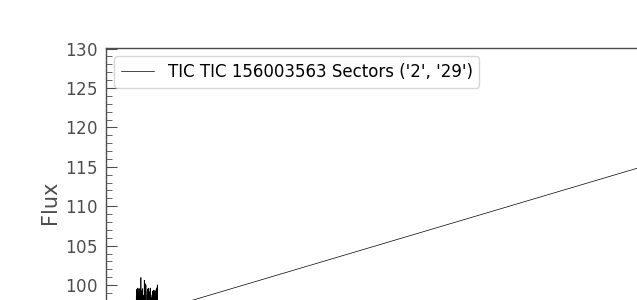

In [20]:
# Define list of sectors to download
sectors = ('2', '29')

# Download and concatenate light curves for each sector
lc_all = []
for sector in sectors:
    # Download light curve
    lc = lk.search_lightcurve(TIC, sector=int(sector)).download().remove_nans().remove_outliers(sigma=6)
    # Remove nans
    lc = lc.remove_nans()
    # Append to list
    lc_all.append(lc)

# Concatenate light curves and remove nans
lc_all = lc_all[0].append(lc_all[1:])

# Plot light curves
lc_all.plot(label='TIC '+str(TIC)+' Sectors '+str(sectors), c='k', lw=0.5)

# Add legend and axis labels
plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('Flux')

# Show plot
plt.show()


<IPython.core.display.Javascript object>


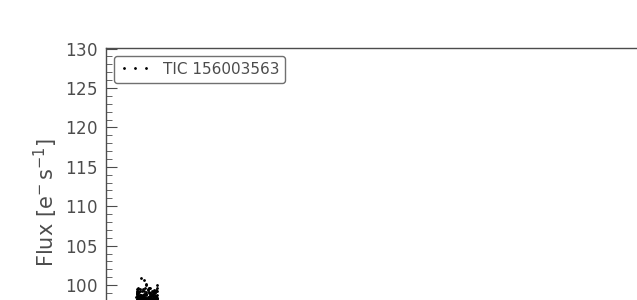

In [21]:
lc_all.plot(color = 'black', lw = 0, marker = '.');

<IPython.core.display.Javascript object>


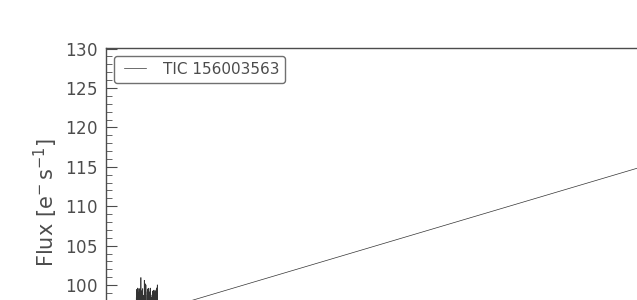

<IPython.core.display.Javascript object>


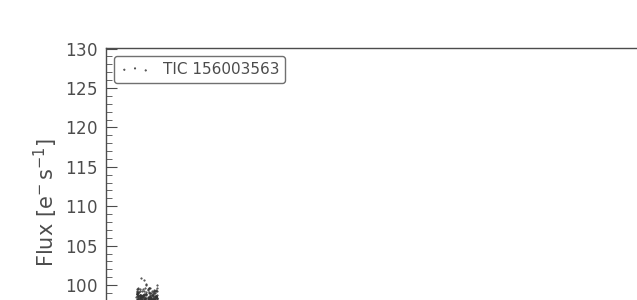

In [22]:
mask = ((lc_all.time.value < 250000)&(lc_all.time.value > 0))
masked_lc=lc_all[mask];
masked_lc.plot();
masked_lc.scatter(s=1);

<IPython.core.display.Javascript object>


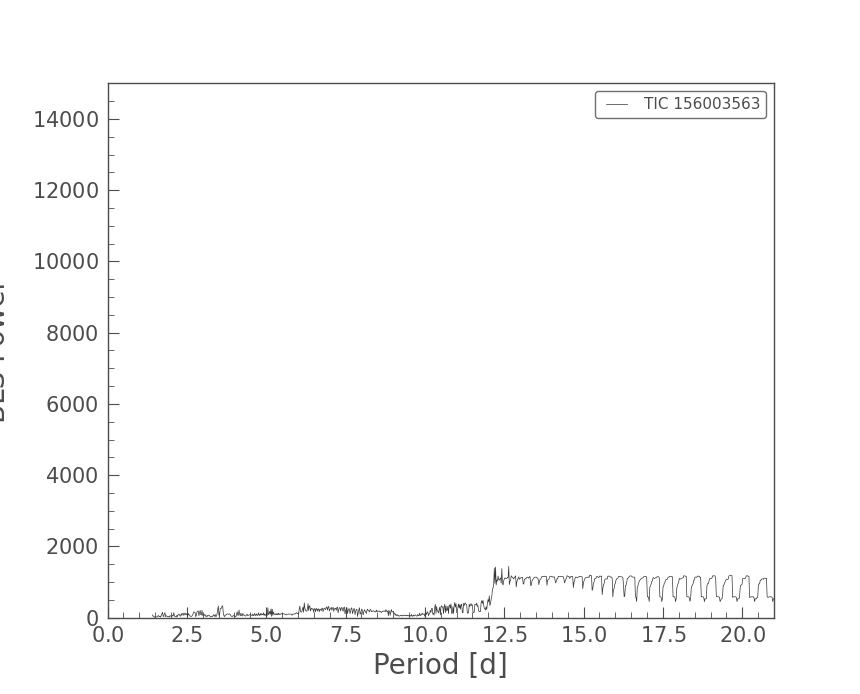

Period at 1th max power = 12.641680680680678961 d
BLS max power = 1439.376398
Epoch max power = 2458354.339828
----------------------------------------
Period at 2th max power = 12.226683683683683412 d
BLS max power = 1420.773410
Epoch max power = 2458354.384828
----------------------------------------
Period at 3th max power = 12.187160160160159350 d
BLS max power = 1392.508735
Epoch max power = 2458356.834828
----------------------------------------
Period at 4th max power = 12.424301301301301947 d
BLS max power = 1377.430342
Epoch max power = 2458354.564828
----------------------------------------
Period at 5th max power = 15.190947947947947227 d
BLS max power = 1192.600252
Epoch max power = 2458354.374828
----------------------------------------
Period at 6th max power = 15.210709709709709259 d
BLS max power = 1191.670508
Epoch max power = 2458354.354828
----------------------------------------
Period at 7th max power = 19.657106106106105869 d
BLS max power = 1183.094653
Epoch max 

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(1.417,21.159,1000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 21)
plt.ylim([0, 15000])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(15):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


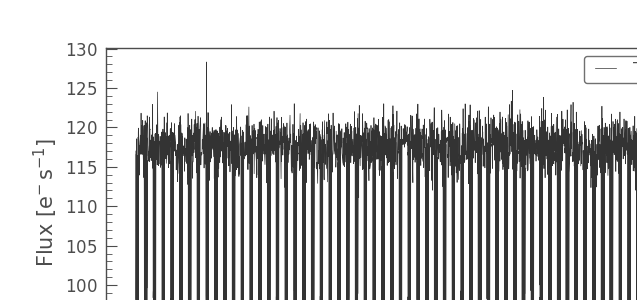

<IPython.core.display.Javascript object>


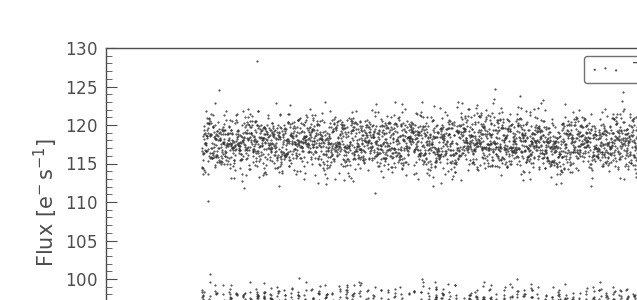

(90.0, 130.0)

In [39]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue = 1.417
epochtime = 2458354.2198
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1,1)
plt.ylim(90,130)


C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


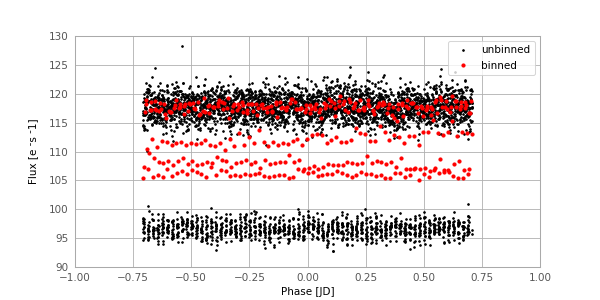

(90.0, 130.0)

In [42]:
folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
# Obtain the dimensions of the lightkurve data
plt.xlim(-1,1)
plt.ylim(90,130)

In [43]:
min = np.nanmin(folded2_lc_binned.flux).value #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux).value #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('Median flux =', median)
q3 = np.nanpercentile(folded2_lc_binned.flux, 75).value
print('Third quartile (q3) =', q3)
max = np.nanpercentile(folded2_lc_binned.flux, 100).value
Tdepth = np.abs(q3 - min)
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  105.11014556884766
Median flux = 115.41719055175781
Third quartile (q3) = 117.71935844421387
Tdepth =  12.609212875366211
Tdepth in ppm =  12609212.875366211 ppm
Rp/Rs ratio =  3.5509453495324608


In [44]:
planet_b_period = bls.period_at_max_power.value
planet_b_t0 = bls.transit_time_at_max_power.value
planet_b_dur = bls.duration_at_max_power.value

In [45]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power.value
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  10.430466769996553
depth in ppm = 10430466.769996554 ppm


In [46]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

12.641680680680679 d
1354.3398277967754
0.33 d


In [47]:
P = period * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = (0.195606) * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a[0] , 'm')
print('a =',a[0]/1000 , 'km')
print('a =',a[0]/1000 * 0.000000006684587, 'AU')
a_km = a[0]/1000
a_au = a[0]/1000 * 0.000000006684587

Orbital Radius
a = 2144033773.0768328 m
a = 2144033.7730768328 km
a = 0.014331980287070346 AU


In [48]:
import numpy as np

# Calculate ri and ro
L = (0.003482488) # Star's luminosity
ri = (L/1.1)**(1/2)
ro = (L/0.53)**(1/2)

# Check if planet is in habitable zone
if np.all(a>=ri) and np.all(a<=ro):
    print('It is in the Habitable Zone')
else:
    print('It is not in the habitable zone')


It is not in the habitable zone


In [49]:
Rs = (0.226226) #Star's radius
Rsun  = 695700 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Tdepth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs[0])
RadiustoEarth = Rp/Rearth

Planet Radius
Rp = 558867.0543509651 km
Rp= 87.72046057933842 Rearth
Orbital Period and Star Radius ratio
a/Rs = 13.622822631026986


In [50]:
import math
hours_to_seconds = 3600.0
solar_radii_to_meters = 6.96**(10*8)
transit_duration_seconds = planet_b_t0 * hours_to_seconds
planet_mass = (transit_duration_seconds / (math.pi * (Rp**2) * M))**0.5

print("Planet mass: {:.2f} Earth masses".format(planet_mass / 5.972168*(10**24)))
PlanettoEarthMass=planet_mass/5.972168*(10**24)

Planet mass: 598479.13 Earth masses


In [51]:
P = period * 24 * 60 * 60
pi = math.pi
a = a #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v[0] , 'm/s')

Planet Velocity
v = 110034.25257041778 m/s


In [57]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a[0] , 'm')
print('a =',a[0]/1000 , 'km')
print('a =',a[0]/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs[0])
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v[0] , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  12.641680680680679 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  7.92 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  12.609212875366211
Transit depth in ppm =  12609212.875366211 ppm
Transit Depth from bls model in ppm = 10430466.769996554 ppm
Rp/Rs ratio =  3.5509453495324608
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 558867.0543509651 km
Rp= 87.72046057933842 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 2144033773.0768328 m
a = 2144033.7730768328 km
a = 0.014331980287070346 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 13.622822631026986
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 110034.25257041778 m/s
- - - - - - - - - - - - - - - - - - - - 


In [70]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (planet_b_dur ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt[0])
print('Tt in hours =', Tt[0] * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt[0])**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt[0])**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a[0]/1000))
print('Inclination i =', 90-i, 'deg')

Total transit duration T14 Tt = 0.35280413422114
Tt in hours = 8.46729922130736 hours
Impart parameter b = 329.8199408725831
Inclination i = (90+3.8795207570589745j) deg


In [71]:
lk.show_citation_instructions()